In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/courtney/voxelmorph/src')

In [8]:
with open('../src/seg_feature_stats.txt', 'rb') as file:
    feature_stats = pickle.loads(file.read()) # use `pickle.loads` to do the reverse

# print(feature_stats[1]['mean'][42-16])
# print(feature_stats[1][99][42-16])
# print(feature_stats[1][90][42-16])
# print(feature_stats.keys())

IndexError: index 26 is out of bounds for axis 0 with size 1

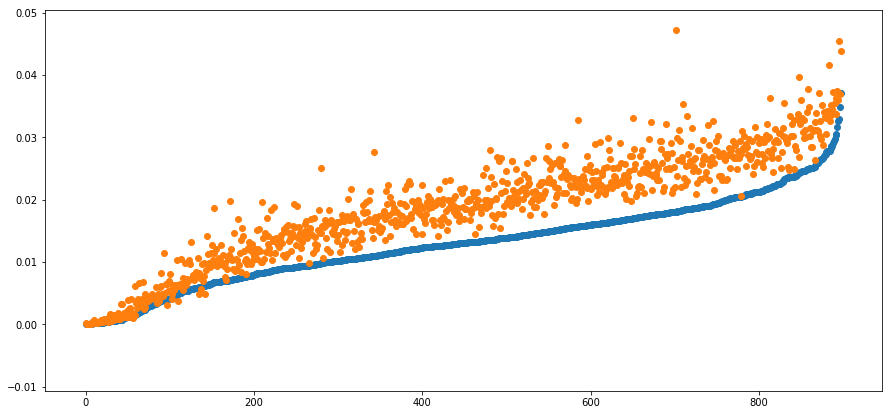

In [17]:
with open('/home/courtney/voxelmorph/src/seg_feature_cvpr_results.txt', 'rb') as file:
    cvpr_results = pickle.loads(file.read()) # use `pickle.loads` to do the reverse

    
with open('/home/courtney/voxelmorph/src/seg_feature_seg_results.txt', 'rb') as file:
    seg_results = pickle.loads(file.read()) # use `pickle.loads` to do the reverse

deltas = []
cvpr = []
seg = []
for key, value in cvpr_results.items():
    deltas.append(np.array(value['l2_diff']) - np.array(seg_results[key]['l2_diff']))
    cvpr.append(np.array(value['l2_diff']))
    seg.append(np.array(seg_results[key]['l2_diff']))

deltas = np.array(deltas)

delta_means = np.mean(deltas, axis=0)
cvpr_means = np.mean(cvpr, axis=0)
seg_means = np.mean(seg, axis=0)

plt.figure(figsize=(15, 7))

idxes = np.argsort(seg_means)

# sorting by seg mean first and then plotting
plt.scatter([i for i in range(len(seg_means))], seg_means[idxes])
plt.scatter([i for i in range(len(cvpr_means))], cvpr_means[idxes])

# plt.scatter(seg_means, cvpr_means)

std = np.std(deltas, axis=0)
idx = np.arange(len(delta_means))
plt.figure(figsize=(15, 7))
# plt.errorbar([i for i in range(len(delta_means))], delta_means, std/np.sqrt(50))

# print(seg_means[idxes][:10])
# print(idxes)

# plt.scatter([i for i in range(len(means[:16]))], means[:16])
# mask = means>0.012

# plt.errorbar(idx[mask], means[mask], (std)[mask])

# tstats = delta_means/std*np.sqrt(50)
# print(results)

In [6]:
means

array([0.00644856, 0.00676611, 0.01454899, 0.00718561, 0.00630122,
       0.00404741, 0.00700439, 0.01600032, 0.01046088, 0.00135804,
       0.00438294, 0.00756382, 0.00817717, 0.01315414, 0.0077331 ,
       0.00057625, 0.0048235 , 0.00774468, 0.00743434, 0.0035952 ,
       0.00773981, 0.00679621, 0.0089107 , 0.00882603, 0.00435992,
       0.004872  , 0.00507017, 0.0167827 , 0.0049342 , 0.00512328,
       0.00512287, 0.01117376, 0.00963887, 0.00605049, 0.00467903,
       0.00114983, 0.00845953, 0.00440875, 0.00237357, 0.00069585,
       0.00398466, 0.00032893, 0.0045435 , 0.00576179, 0.00101602,
       0.00052902, 0.00699095, 0.00722229, 0.00481527, 0.00416918,
       0.00631595, 0.00586233, 0.00900358, 0.00621227, 0.0048005 ,
       0.00478634, 0.00461208, 0.0113926 , 0.00401226, 0.00479952,
       0.00479396, 0.00421512, 0.00020898, 0.00395687, 0.00406725,
       0.0062826 , 0.00417445, 0.00457884, 0.00411097, 0.00478997,
       0.00656023, 0.00347701, 0.00321435, 0.00084554, 0.01575

In [8]:
std

array([0.0016005 , 0.00181116, 0.0234395 , 0.00452919, 0.00093075,
       0.00112833, 0.0064701 , 0.02669827, 0.0161529 , 0.00312449,
       0.0008888 , 0.00647642, 0.00495781, 0.02110401, 0.00500458,
       0.00140159, 0.00544125, 0.00236379, 0.00564054, 0.00228249,
       0.0049787 , 0.00385546, 0.00161968, 0.01343087, 0.00196611,
       0.00100833, 0.00248587, 0.02814129, 0.00496353, 0.00334532,
       0.00665262, 0.0156191 , 0.0079729 , 0.0012959 , 0.00278206,
       0.00080131, 0.0049804 , 0.00121647, 0.00436419, 0.00125292,
       0.00277637, 0.00103127, 0.00249769, 0.00126479, 0.00065199,
       0.00038451, 0.00338677, 0.01181678, 0.00419103, 0.00156236,
       0.00437569, 0.00317802, 0.00539279, 0.00310977, 0.00322149,
       0.00378021, 0.00200646, 0.0073959 , 0.00314017, 0.00463774,
       0.00635153, 0.00298474, 0.00061951, 0.00209101, 0.00230315,
       0.00246127, 0.00195271, 0.00263826, 0.00554629, 0.00211316,
       0.00407616, 0.00218427, 0.00166583, 0.00147278, 0.02692

In [9]:
tstats

array([28.48989475, 26.4160254 ,  4.38904121, 11.21832724, 47.8715214 ,
       25.36457858,  7.65498208,  4.23770264,  4.57934003,  3.07339779,
       34.86943774,  8.25831334, 11.66268164,  4.40739891, 10.92624297,
        2.90718185,  6.26828152, 23.16752177,  9.31979711, 11.13778074,
       10.99257202, 12.46452645, 38.90153613,  4.64671766, 15.68031568,
       34.16553092, 14.42211373,  4.21699236,  7.02928299, 10.82917316,
        5.4451016 ,  5.05857501,  8.54859346, 33.01452361, 11.89252665,
       10.1464442 , 12.0106745 , 25.62709834,  3.84577996,  3.92715667,
       10.14842847,  2.2553359 , 12.86281564, 32.21248418, 11.01922442,
        9.72869429, 14.59605182,  4.32176124,  8.1242696 , 18.8692605 ,
       10.20651374, 13.04363818, 11.8055526 , 14.12559343, 10.53694887,
        8.95308205, 16.25370186, 10.8922195 ,  9.0348478 ,  7.31773473,
        5.33705079,  9.98593516,  2.38525482, 13.38079672, 12.48719854,
       18.04949223, 15.11632339, 12.27220748,  5.2411507 , 16.02